
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime



In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [5]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [6]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [7]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,2730.002686,884.0
1379,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,2730.002686,884.0
1380,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,2730.002686,884.0
1381,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,2730.002686,884.0



## Training Functions


In [8]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': []}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_A.item()  )
        history['loss_B'].append( 0 ) # loss_B.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [9]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.3695343732833862
seq length of pred =  30
500 train loss =  0.05006005987524986
seq length of pred =  30
1000 train loss =  0.02143755555152893
seq length of pred =  30
1500 train loss =  0.010507485829293728
seq length of pred =  30
2000 train loss =  0.005992597434669733
seq length of pred =  30
2500 train loss =  0.004526919685304165
seq length of pred =  30


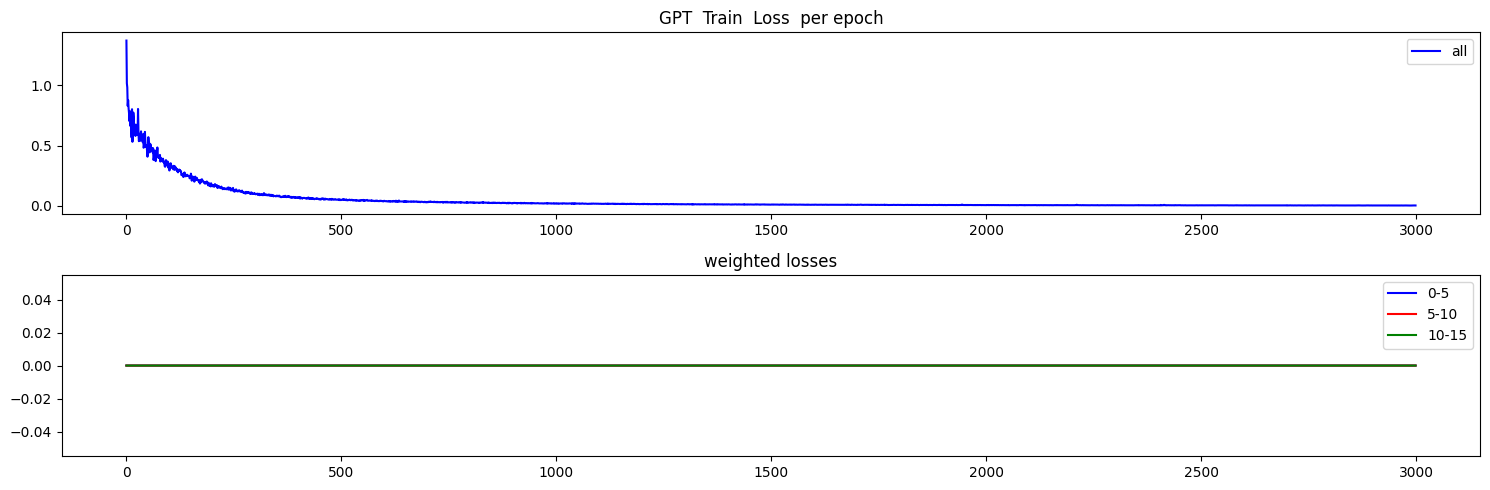

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10610824823379517
Test MSE Loss - SI only 0-5:  0.3205046057701111
Test MSE Loss - SI only 5-10:  0.03765535727143288
Test MSE Loss - SI only 10-15:  0.06872066855430603
mae, mse, rmse, mape, mspe, rse, corr
(0.24593067, 0.106108256, 0.32574263, 2.647289, 59.246822, 1.4657302)
Testing R**2 - SI only:  -1.148364686303612
Testing R**2 - SI only:  -1.148364686303612
Testing R**2 - All features:  0.9891416346794537


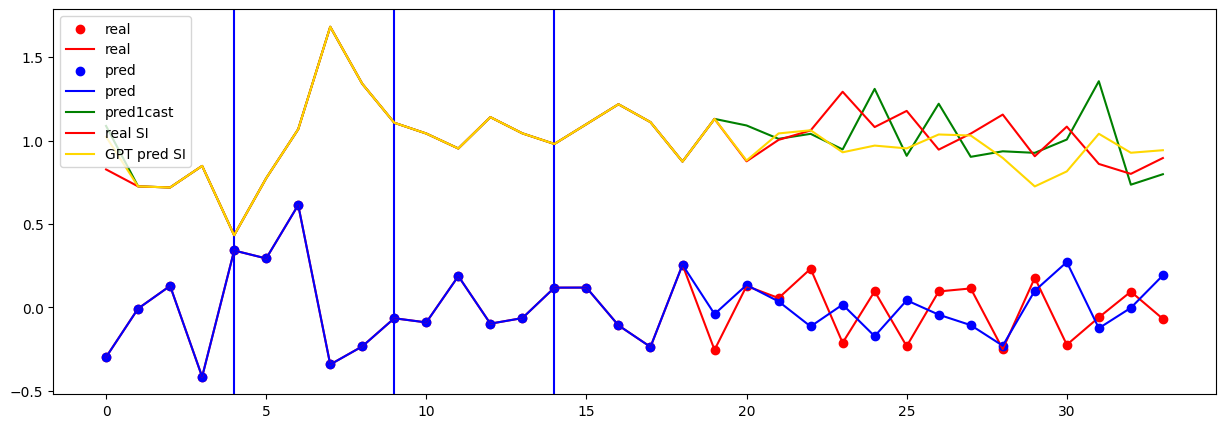

In [10]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.4385849237442017
seq length of pred =  30
500 train loss =  0.10308220982551575
seq length of pred =  30
1000 train loss =  0.0373319536447525
seq length of pred =  30
1500 train loss =  0.02192148193717003
seq length of pred =  30
2000 train loss =  0.02805999107658863
seq length of pred =  30
2500 train loss =  0.01081402599811554
seq length of pred =  30


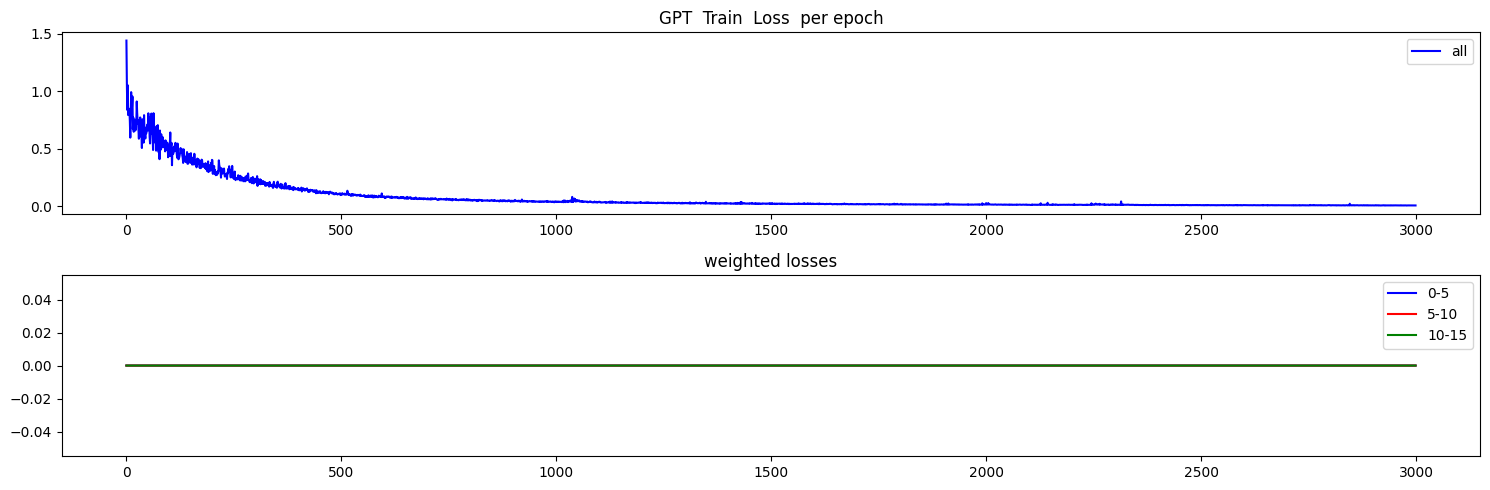

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09821150451898575
Test MSE Loss - SI only 0-5:  0.3205046057701111
Test MSE Loss - SI only 5-10:  0.037655364722013474
Test MSE Loss - SI only 10-15:  0.06872067600488663
mae, mse, rmse, mape, mspe, rse, corr
(0.22957306, 0.098211505, 0.31338716, 2.4239256, 58.056595, 1.4101348)
Testing R**2 - SI only:  -0.9884799599593355
Testing R**2 - SI only:  -0.9884799599593355
Testing R**2 - All features:  0.98981219312279


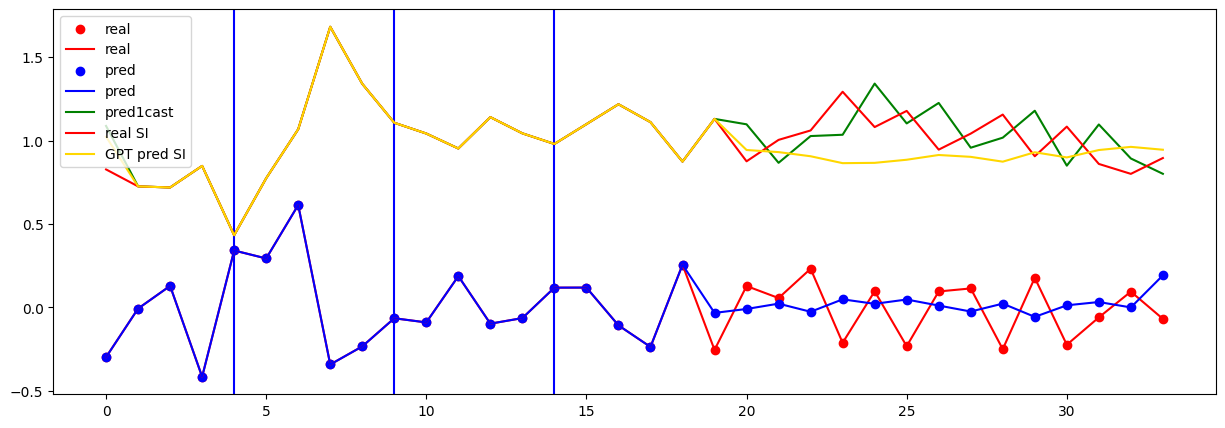

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.2824418544769287
seq length of pred =  30
500 train loss =  0.19865012168884277
seq length of pred =  30
1000 train loss =  0.056679051369428635
seq length of pred =  30
1500 train loss =  0.03261391073465347
seq length of pred =  30
2000 train loss =  0.023432549089193344
seq length of pred =  30
2500 train loss =  0.017780089750885963
seq length of pred =  30


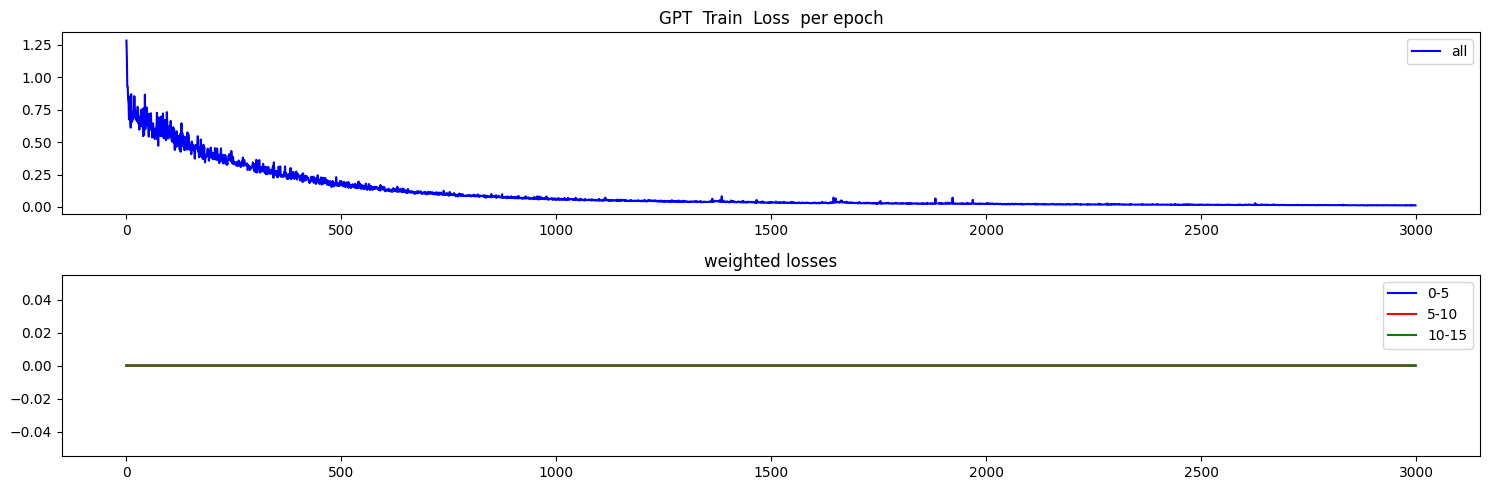

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10535065084695816
Test MSE Loss - SI only 0-5:  0.3205046057701111
Test MSE Loss - SI only 5-10:  0.037655360996723175
Test MSE Loss - SI only 10-15:  0.06872066855430603
mae, mse, rmse, mape, mspe, rse, corr
(0.24020723, 0.10535064, 0.32457763, 2.4504564, 58.20029, 1.460488)
Testing R**2 - SI only:  -1.1330255259988293
Testing R**2 - SI only:  -1.1330255259988293
Testing R**2 - All features:  0.991371069330479


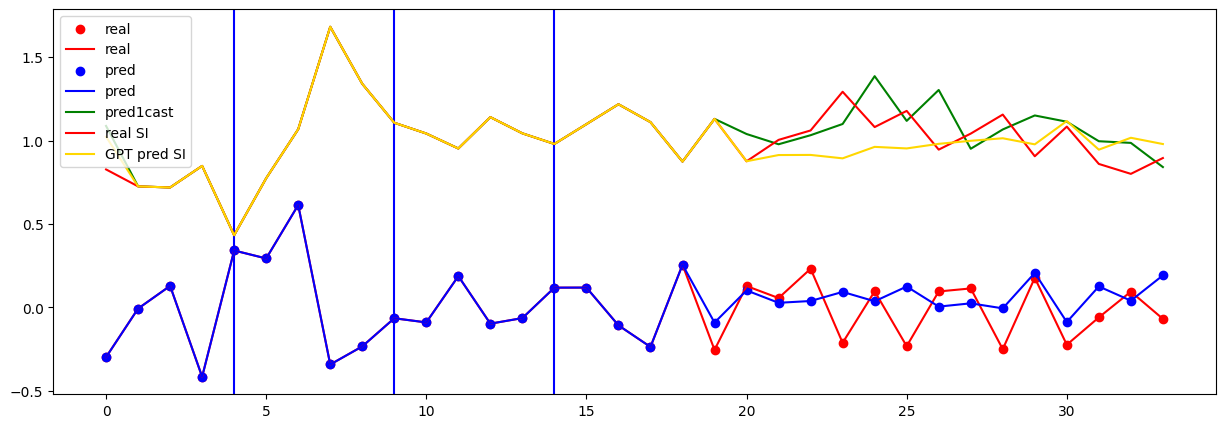

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.1015963554382324
seq length of pred =  30
500 train loss =  0.21460720896720886
seq length of pred =  30
1000 train loss =  0.08409445732831955
seq length of pred =  30
1500 train loss =  0.04212483763694763
seq length of pred =  30
2000 train loss =  0.025914378464221954
seq length of pred =  30
2500 train loss =  0.019490748643875122
seq length of pred =  30


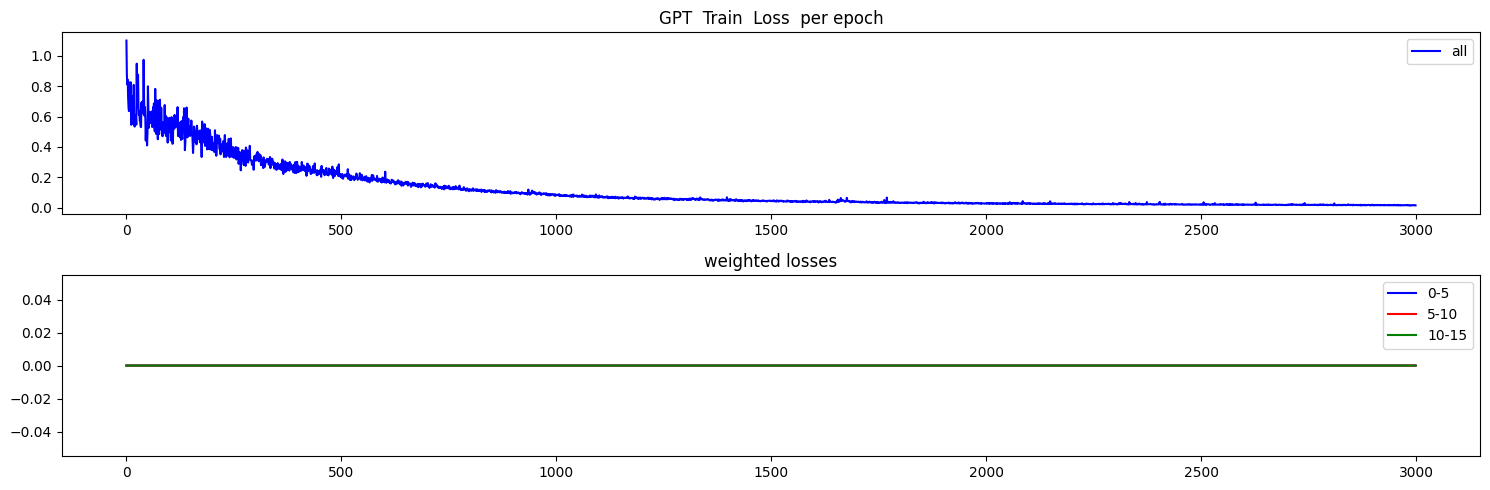

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10439606755971909
Test MSE Loss - SI only 0-5:  0.3205046057701111
Test MSE Loss - SI only 5-10:  0.037655360996723175
Test MSE Loss - SI only 10-15:  0.06872067600488663
mae, mse, rmse, mape, mspe, rse, corr
(0.24459188, 0.104396075, 0.32310382, 2.5655613, 58.58935, 1.4538565)
Testing R**2 - SI only:  -1.1136983170465857
Testing R**2 - SI only:  -1.1136983170465857
Testing R**2 - All features:  0.9845062978970078


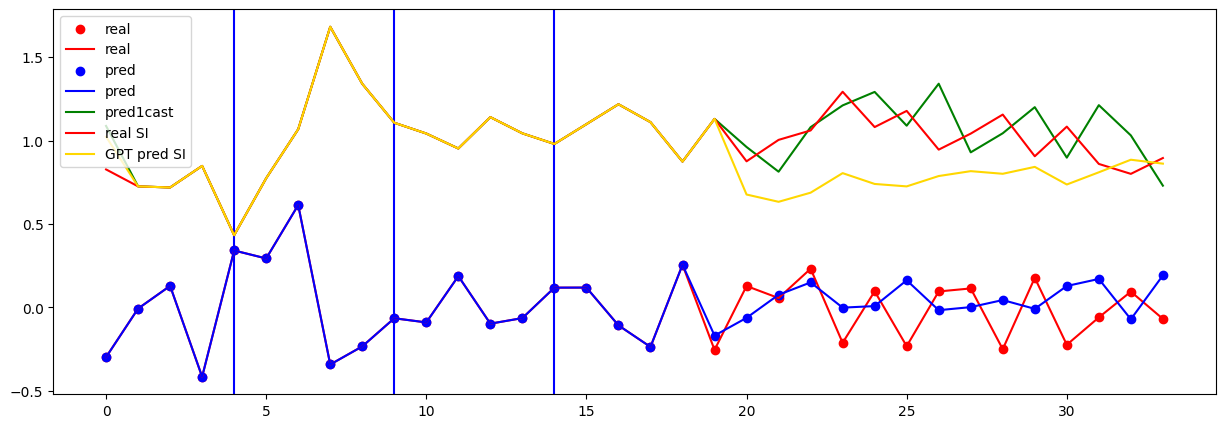

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  1.4684691429138184
seq length of pred =  30
500 train loss =  0.05289393663406372
seq length of pred =  30
1000 train loss =  0.02184823527932167
seq length of pred =  30
1500 train loss =  0.011447365395724773
seq length of pred =  30
2000 train loss =  0.007041935808956623
seq length of pred =  30
2500 train loss =  0.004799002781510353
seq length of pred =  30


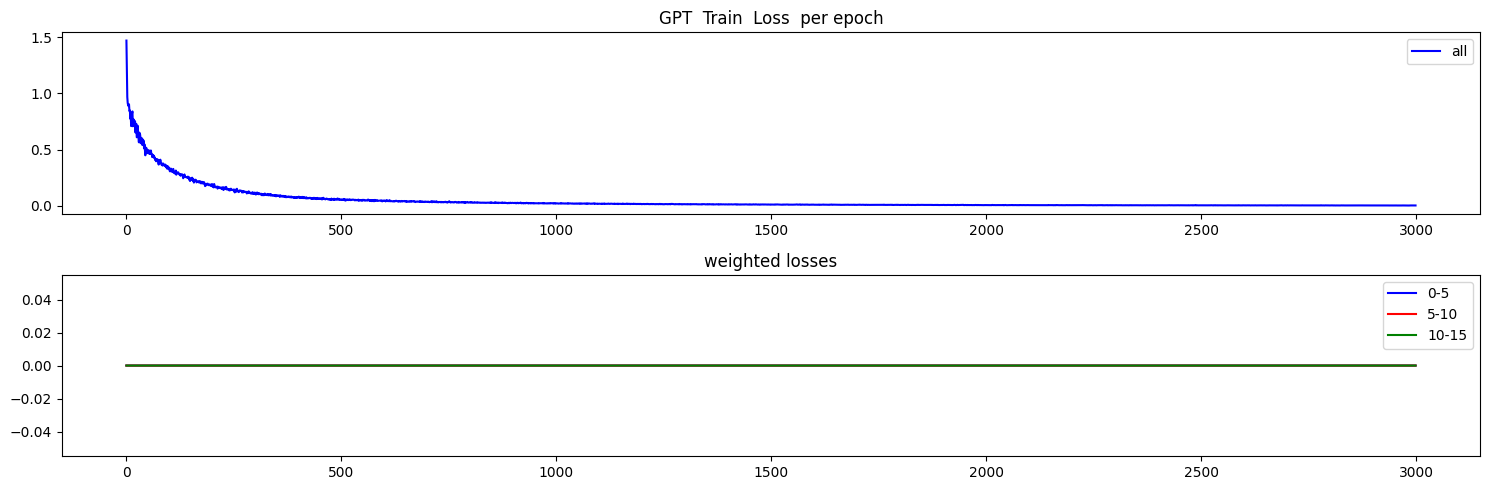

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.08785394579172134
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.07633031159639359
Test MSE Loss - SI only 10-15:  0.05545998364686966
mae, mse, rmse, mape, mspe, rse, corr
(0.20953274, 0.087853946, 0.29640165, 11.295936, 2930.2231, 1.4959241)
Testing R**2 - SI only:  -1.237788732033012
Testing R**2 - SI only:  -1.237788732033012
Testing R**2 - All features:  0.9909117913791888


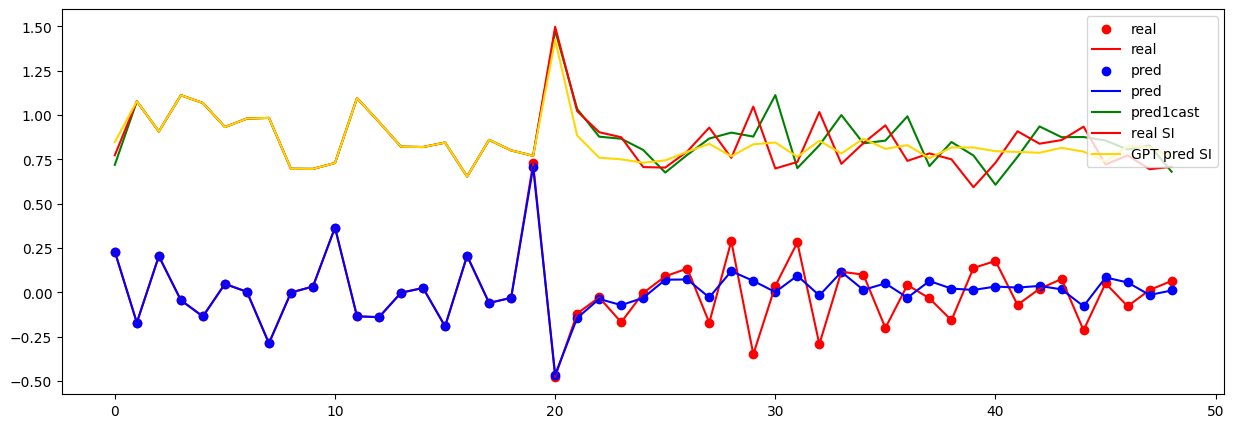

In [14]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  1.2005029916763306
seq length of pred =  30
500 train loss =  0.04846620932221413
seq length of pred =  30
1000 train loss =  0.020134152844548225
seq length of pred =  30
1500 train loss =  0.009615233168005943
seq length of pred =  30
2000 train loss =  0.0066296677105128765
seq length of pred =  30
2500 train loss =  0.004950184840708971
seq length of pred =  30


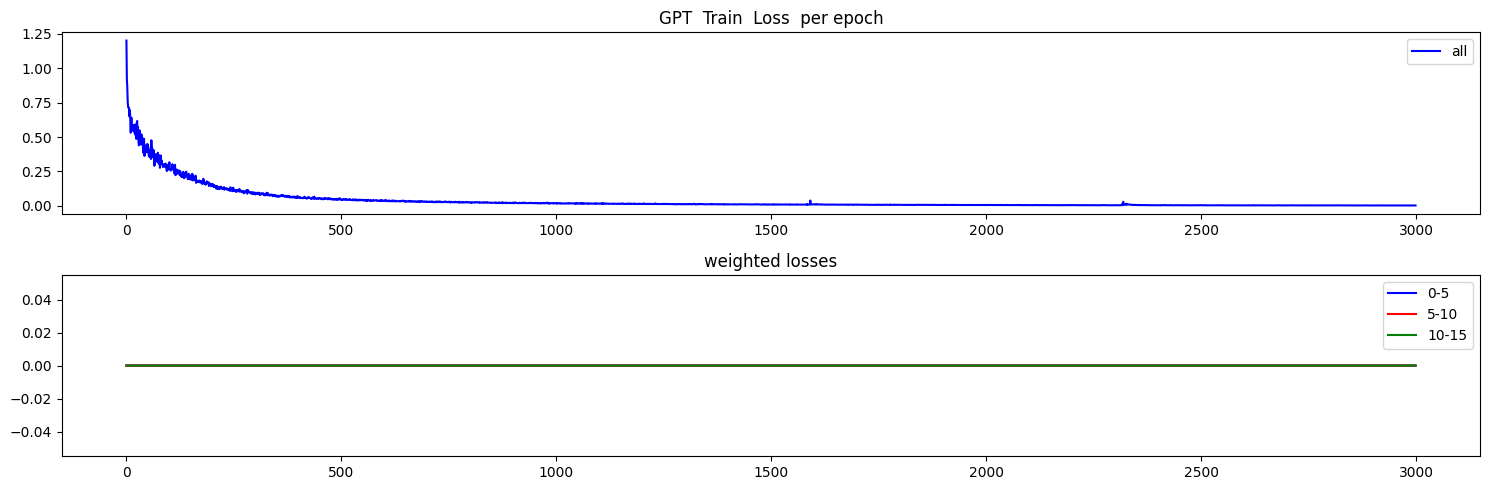

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.10310733318328857
Test MSE Loss - SI only 0-5:  0.4357689917087555
Test MSE Loss - SI only 5-10:  0.06865420937538147
Test MSE Loss - SI only 10-15:  0.22242562472820282
mae, mse, rmse, mape, mspe, rse, corr
(0.23197766, 0.10310733, 0.3211033, 3.0868201, 77.84314, 1.5501255)
Testing R**2 - SI only:  -1.4028897969204315
Testing R**2 - SI only:  -1.4028897969204315
Testing R**2 - All features:  0.9731199039703944


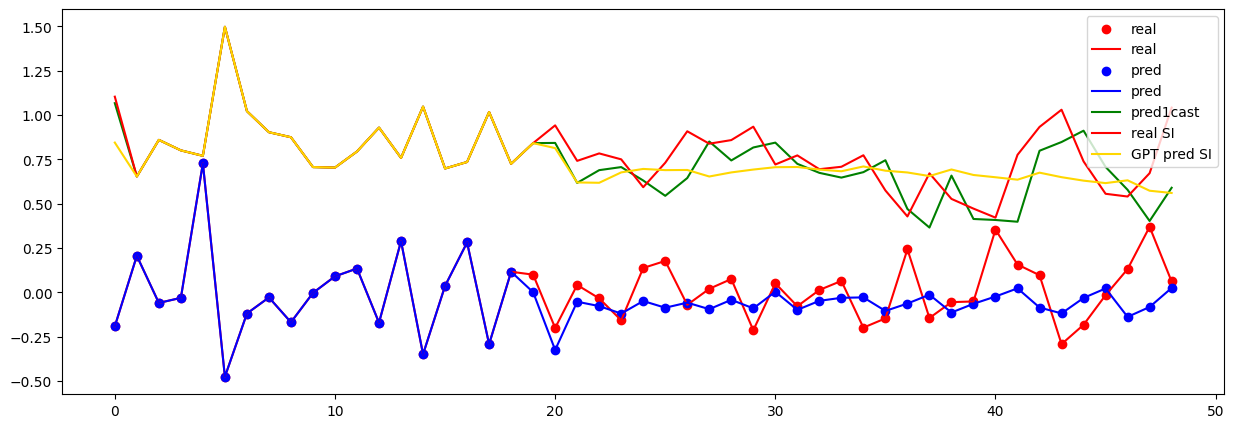

In [15]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  1.3176482915878296
seq length of pred =  30
500 train loss =  0.055321596562862396
seq length of pred =  30
1000 train loss =  0.019648203626275063
seq length of pred =  30
1500 train loss =  0.010941593907773495
seq length of pred =  30
2000 train loss =  0.006723094265908003
seq length of pred =  30
2500 train loss =  0.004621216561645269
seq length of pred =  30


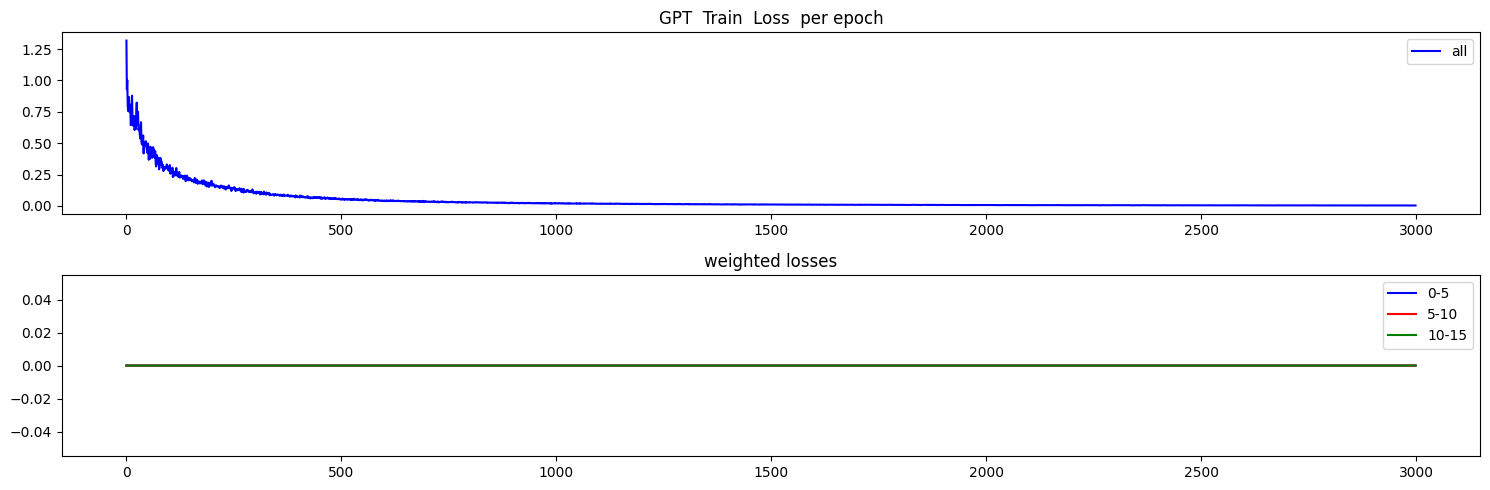

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05437985807657242
Test MSE Loss - SI only 0-5:  0.0340297557413578
Test MSE Loss - SI only 5-10:  0.03222682327032089
Test MSE Loss - SI only 10-15:  0.036190666258335114
mae, mse, rmse, mape, mspe, rse, corr
(0.19458045, 0.054379858, 0.23319489, 5.5613995, 500.49756, 1.3433325)
Testing R**2 - SI only:  -0.8045421991941364
Testing R**2 - SI only:  -0.8045421991941364
Testing R**2 - All features:  0.9341855101354566


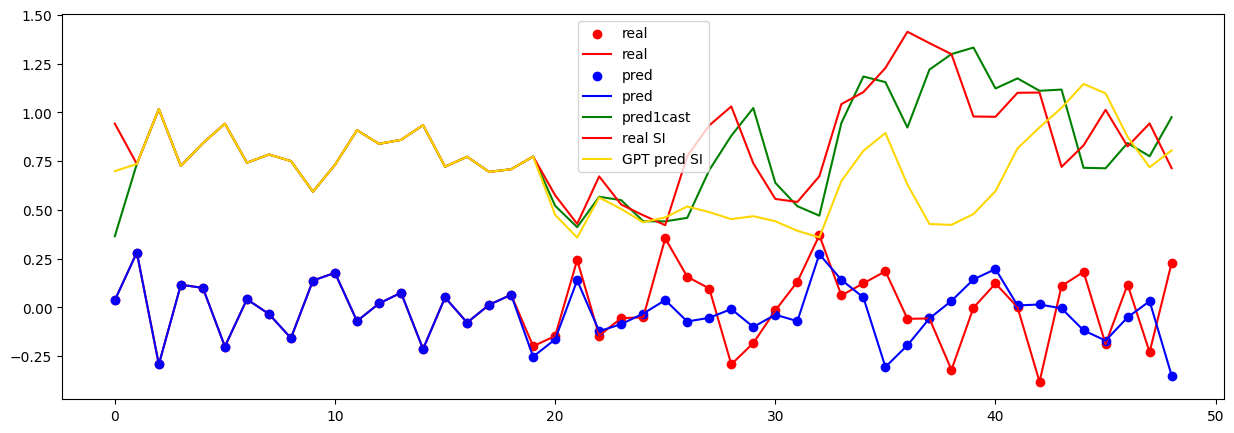

In [16]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  1.3046237230300903
seq length of pred =  30
500 train loss =  0.05081851780414581
seq length of pred =  30
1000 train loss =  0.020760565996170044
seq length of pred =  30
1500 train loss =  0.010302452370524406
seq length of pred =  30
2000 train loss =  0.006263056769967079
seq length of pred =  30
2500 train loss =  0.004265120252966881
seq length of pred =  30


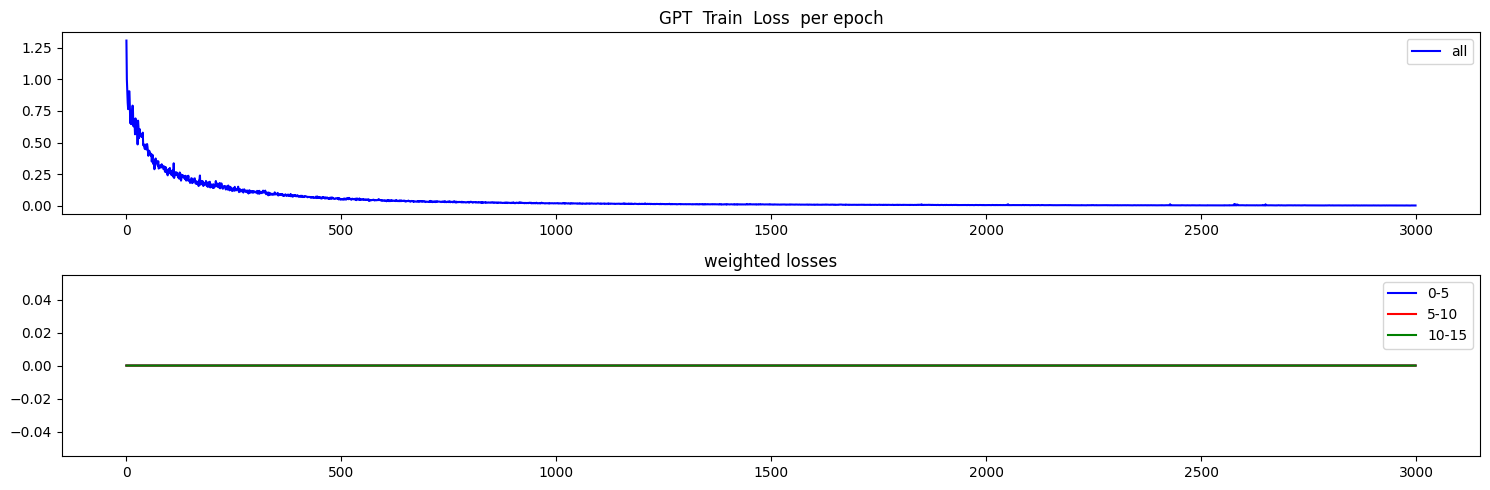

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.036476362496614456
Test MSE Loss - SI only 0-5:  0.07638398557901382
Test MSE Loss - SI only 5-10:  0.07152655720710754
Test MSE Loss - SI only 10-15:  0.042657870799303055
mae, mse, rmse, mape, mspe, rse, corr
(0.15934852, 0.036476362, 0.19098786, 3.296014, 47.67907, 1.1162412)
Testing R**2 - SI only:  -0.2459947857915068
Testing R**2 - SI only:  -0.2459947857915068
Testing R**2 - All features:  0.9219389020238186


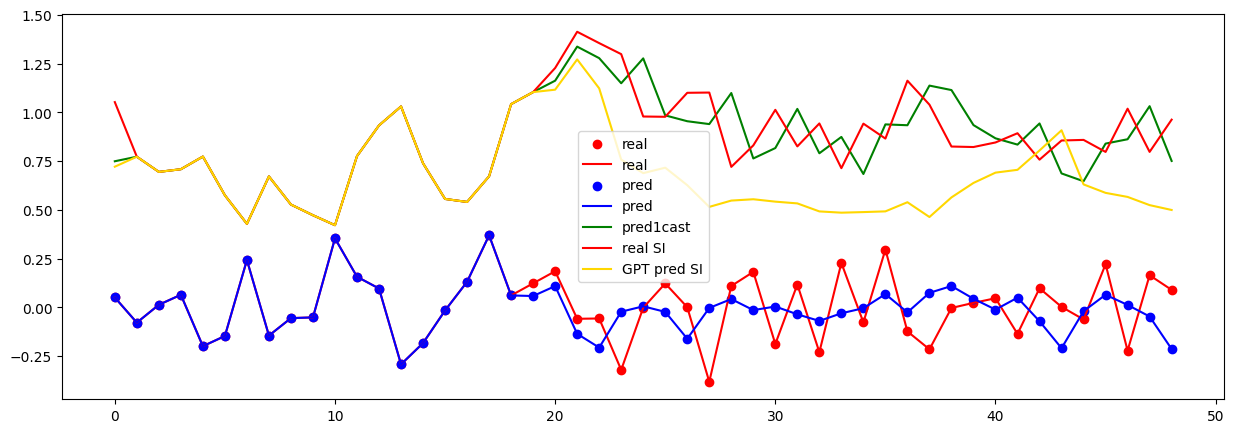

In [17]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  1.5106642246246338
seq length of pred =  30
500 train loss =  0.05099085718393326
seq length of pred =  30
1000 train loss =  0.019369615241885185
seq length of pred =  30
1500 train loss =  0.011179561726748943
seq length of pred =  30
2000 train loss =  0.006303695961833
seq length of pred =  30
2500 train loss =  0.005084092263132334
seq length of pred =  30


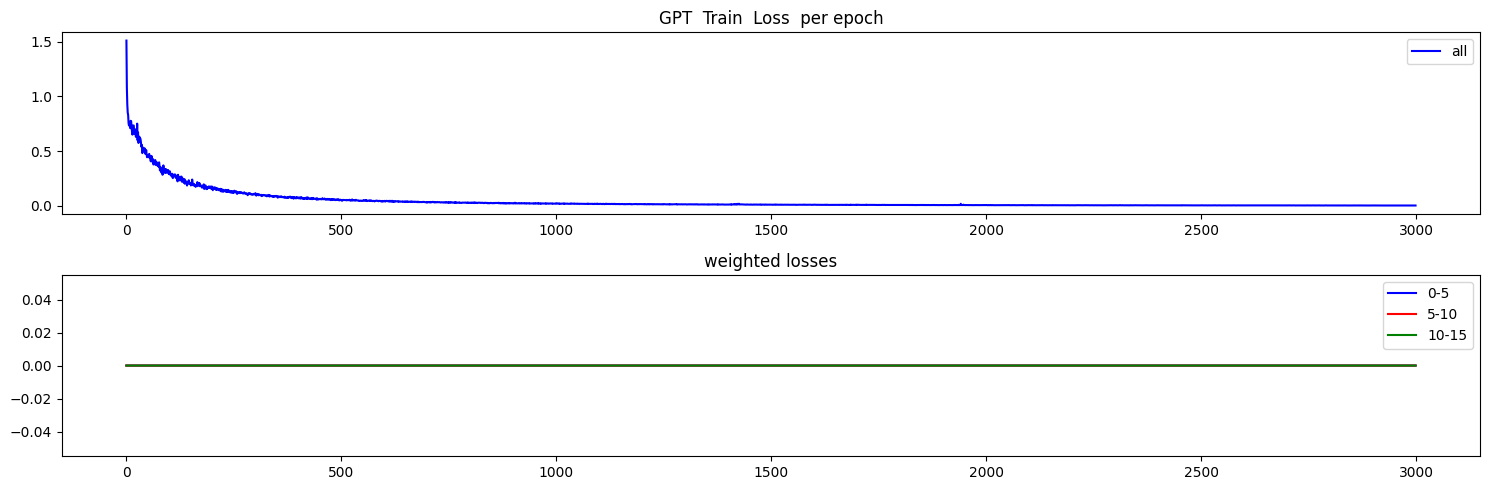

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.06828133016824722
Test MSE Loss - SI only 0-5:  0.027284791693091393
Test MSE Loss - SI only 5-10:  0.10380108654499054
Test MSE Loss - SI only 10-15:  0.11293947696685791
mae, mse, rmse, mape, mspe, rse, corr
(0.20560378, 0.06828133, 0.26130697, 11.651541, 1453.239, 1.542253)
Testing R**2 - SI only:  -1.378544067721959
Testing R**2 - SI only:  -1.378544067721959
Testing R**2 - All features:  0.9282971933415856


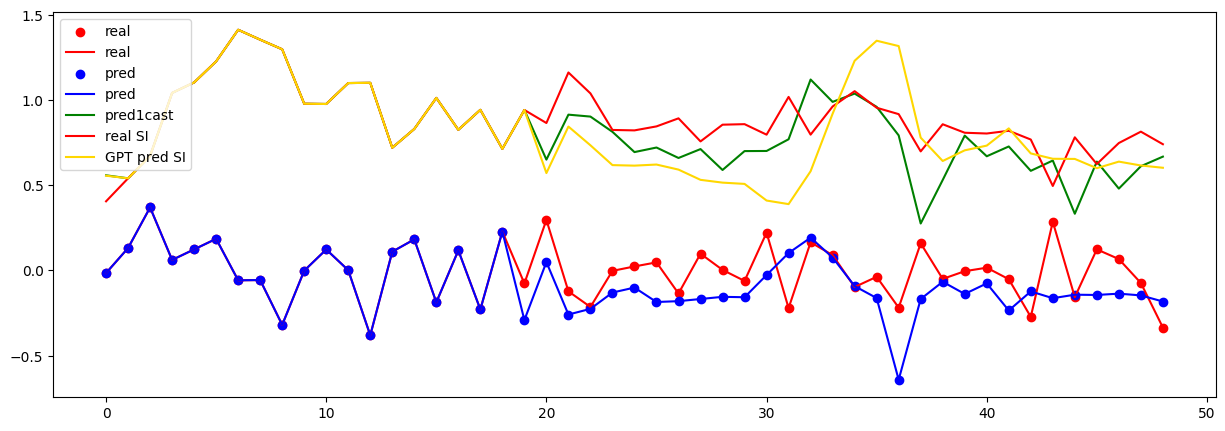

In [18]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  1.3858964443206787
seq length of pred =  30
500 train loss =  0.05716794356703758
seq length of pred =  30
1000 train loss =  0.021197833120822906
seq length of pred =  30
1500 train loss =  0.011699043214321136
seq length of pred =  30
2000 train loss =  0.006418447010219097
seq length of pred =  30
2500 train loss =  0.003912399057298899
seq length of pred =  30


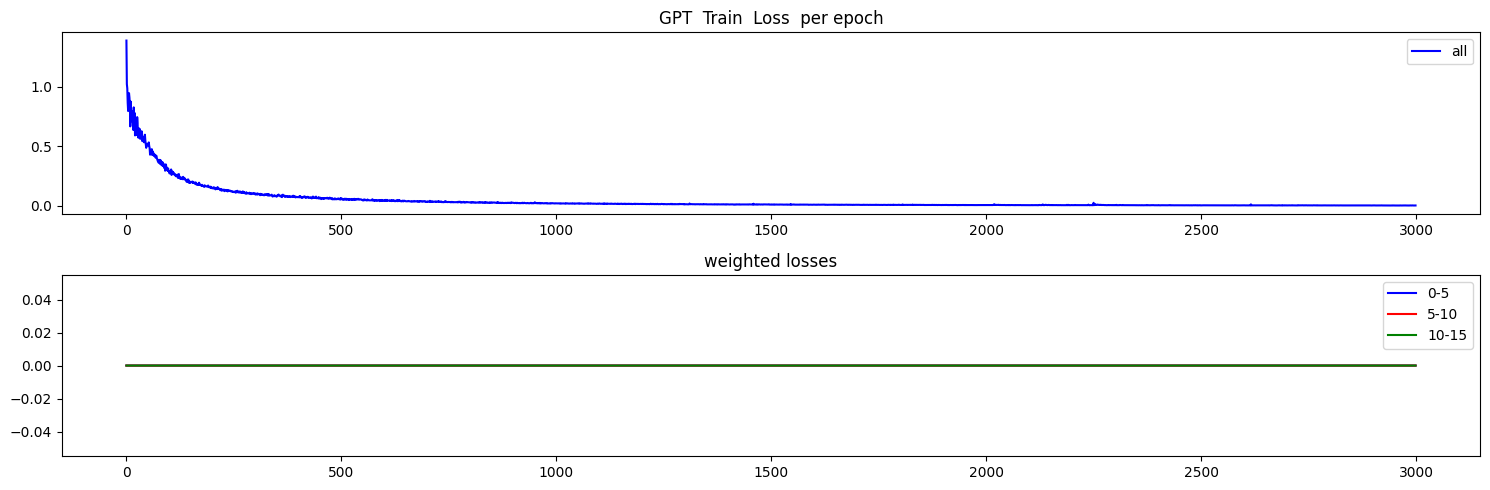

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.11432082206010818
Test MSE Loss - SI only 0-5:  0.09235256165266037
Test MSE Loss - SI only 5-10:  0.01964373141527176
Test MSE Loss - SI only 10-15:  0.08715896308422089
mae, mse, rmse, mape, mspe, rse, corr
(0.24110833, 0.11432082, 0.33811364, 4.664177, 183.56358, 1.1788853)
Testing R**2 - SI only:  -0.3897708857020772
Testing R**2 - SI only:  -0.3897708857020772
Testing R**2 - All features:  0.7699341574956022


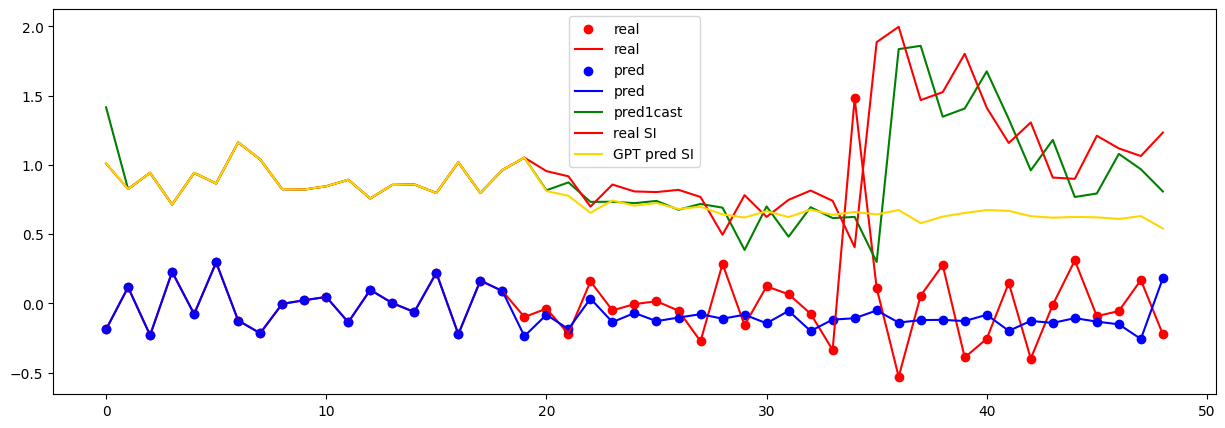

In [19]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  1.1626778841018677
seq length of pred =  30
500 train loss =  0.05787362903356552
seq length of pred =  30
1000 train loss =  0.020771518349647522
seq length of pred =  30
1500 train loss =  0.010374708101153374
seq length of pred =  30
2000 train loss =  0.005880280397832394
seq length of pred =  30
2500 train loss =  0.004265826661139727
seq length of pred =  30


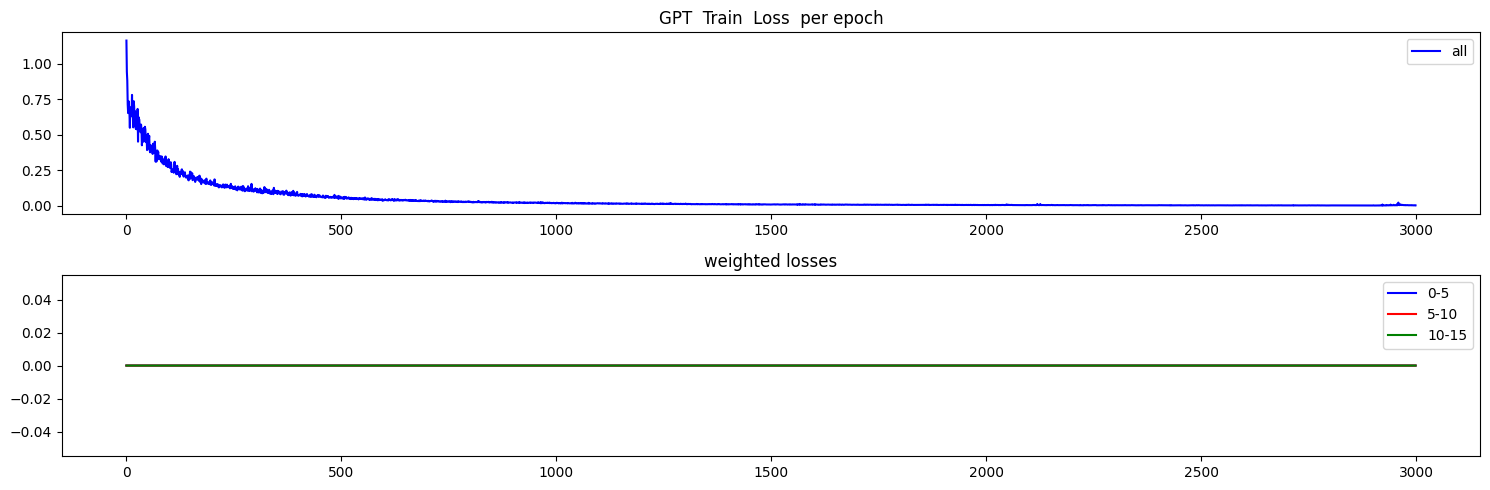

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.18527613580226898
Test MSE Loss - SI only 0-5:  0.0516434982419014
Test MSE Loss - SI only 5-10:  0.07359741628170013
Test MSE Loss - SI only 10-15:  0.073246531188488
mae, mse, rmse, mape, mspe, rse, corr
(0.30113584, 0.18527614, 0.43043715, 3.300749, 29.43085, 1.4789833)
Testing R**2 - SI only:  -1.1873918850808622
Testing R**2 - SI only:  -1.1873918850808622
Testing R**2 - All features:  0.9385155783972142


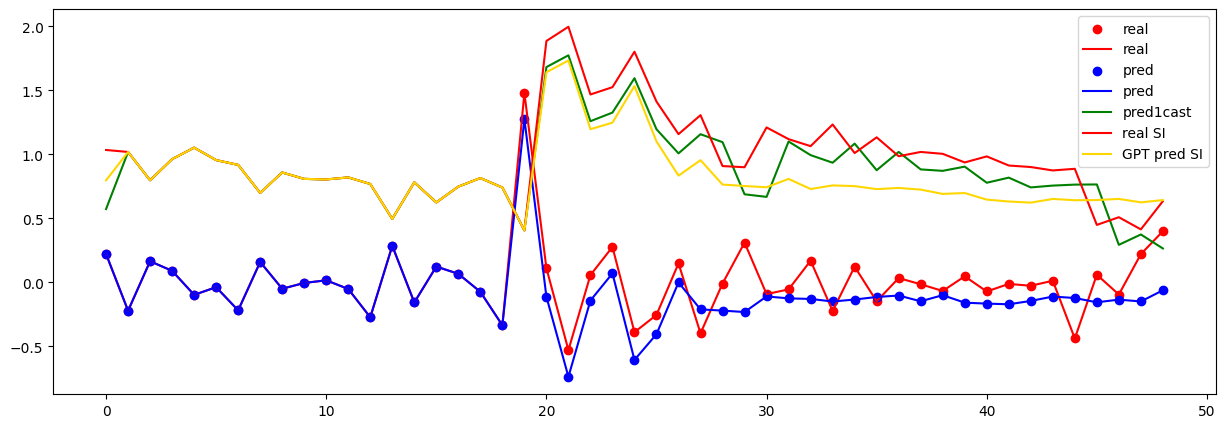

In [20]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [21]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [22]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
